# Calculate bond duration and convexity

In [64]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(array([8.23185931, 8.14618973, 8.05752498, 7.96589645, 7.87134992,
        7.7739461 , 7.67376099, 7.57088602, 7.46542815, 7.35750965,
        7.24726781, 7.13485437, 7.02043478, 6.90418728, 6.78630178,
        6.66697861, 6.54642701, 6.42486366, 6.30251093, 6.17959516]),
 array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
        0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ]))

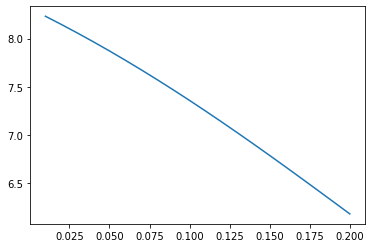

In [68]:

#define the function

def Bond_Dur(m,T,cpr,dr,FV):
    coupon=cpr*FV/m
    BV=FV/(1+dr/m)**(m*T)
    for i in range(1,m*T+1):
        BV=(cpr*FV/m)/(1+dr/m)**(i)+BV
        
    Dur=FV*T*(1+dr/m)**(-m*T)
    for i in range(1,m*T+1):
        Dur=Dur+coupon*(i/m)*(1+dr/m)**(-i)
    Dur=Dur/BV
    return Dur

m=2 #coupon frequcny
T=10 #maturity
FV=1000 #bond face value
cpr=0.055 #coupon rate
dr=r  #discount rate

#draw the graph
fig=plt.figure()
ax=plt.axes()

r=np.linspace(0.01,0.20,20)
ax.plot(r,Bond_Dur(m,T,cpr,dr,FV))

Bond_Dur(m,T,cpr,dr,FV),r

In [56]:
Bond_Dur(2,10,0.05,0.05,1000)

(1000.0000000000015, 7.98944567139399)

In [57]:
def Bond_convexity(m,T,cpr,dr,FV):
    BV=FV/(1+dr/m)**(m*T)
    for i in range(1,m*T+1):
        BV=(cpr*FV/m)/(1+dr/m)**(i)+BV
    convexity=(FV/BV)*((m*T*(m*T+1))/(1+dr/m)**(m*T+2))
    for i in range(1,m*T+1):
        convexity=convexity+(cpr*FV/m/BV)*((i*(i+1))/(1+dr/m)**(i+2))
    return BV,convexity

In [58]:
Bond_convexity(1,3,0.05,0.065,1000)

(960.2728673391492, 9.906018070646114)